In [1]:
#1- Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results.

import numpy as np
from scipy.stats import norm

sample = [72, 74, 71, 70, 73, 75, 74, 72, 73, 71]
sample_mean = np.mean(sample)
sample_size = len(sample)

population_mean = 70
population_std = 2
alpha = 0.05

z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
p_value = 2 * (1 - norm.cdf(abs(z_score)))

print(f"Sample Mean: {sample_mean}")
print(f"Z-Score: {z_score:.4f}")
print(f"P-Value: {p_value:.4f}")


if p_value < alpha:
    print("Result: Reject the null hypothesis.")
    print("Interpretation: There is a statistically significant difference between the sample mean and the population mean.")
else:
    print("Result: Fail to reject the null hypothesis.")
    print("Interpretation: There is no statistically significant difference between the sample mean and the population mean.")



Sample Mean: 72.5
Z-Score: 3.9528
P-Value: 0.0001
Result: Reject the null hypothesis.
Interpretation: There is a statistically significant difference between the sample mean and the population mean.


In [2]:
#2-Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python.
import numpy as np
from scipy.stats import norm

np.random.seed(42)
population_mean = 100
population_std = 15
sample_size = 50

sample = np.random.normal(loc=102, scale=15, size=sample_size)
sample_mean = np.mean(sample)

z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
p_value = 2 * (1 - norm.cdf(abs(z_score)))

print("Sample Mean:", round(sample_mean, 2))
print("Z-Score:", round(z_score, 4))
print("P-Value:", round(p_value, 4))


Sample Mean: 98.62
Z-Score: -0.6515
P-Value: 0.5147


In [3]:
#3- Implement a one-sample Z-test using Python to compare the sample mean with the population mean.
import numpy as np
from scipy.stats import norm

sample = [105, 110, 98, 100, 102, 108, 97, 103, 99, 101]
sample_size = len(sample)
sample_mean = np.mean(sample)

population_mean = 100
population_std = 5

z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
p_value = 2 * (1 - norm.cdf(abs(z_score)))

print("Sample Mean:", round(sample_mean, 2))
print("Z-Score:", round(z_score, 4))
print("P-Value:", round(p_value, 4))


Sample Mean: 102.3
Z-Score: 1.4546
P-Value: 0.1458


Sample Mean: 102.3
Z-Score: 1.4546
P-Value: 0.1458
Z-Critical (±): 1.96


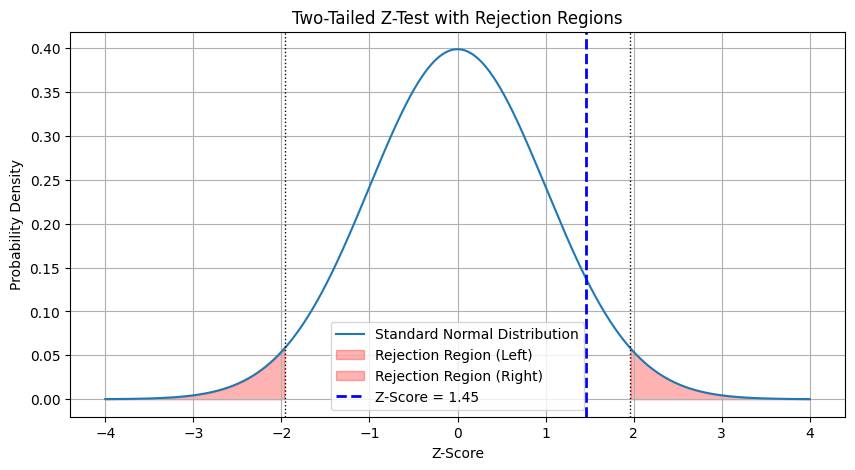

In [5]:
#4-Perform a two-tailed Z-test using Python and visualize the decision region on a plot.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

sample = [105, 110, 98, 100, 102, 108, 97, 103, 99, 101]
sample_size = len(sample)
sample_mean = np.mean(sample)

population_mean = 100
population_std = 5
alpha = 0.05

z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
p_value = 2 * (1 - norm.cdf(abs(z_score)))

z_critical = norm.ppf(1 - alpha / 2)

print("Sample Mean:", round(sample_mean, 2))
print("Z-Score:", round(z_score, 4))
print("P-Value:", round(p_value, 4))
print("Z-Critical (±):", round(z_critical, 4))

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Standard Normal Distribution')

plt.fill_between(x, y, where=(x <= -z_critical), color='red', alpha=0.3, label='Rejection Region (Left)')
plt.fill_between(x, y, where=(x >= z_critical), color='red', alpha=0.3, label='Rejection Region (Right)')

plt.axvline(z_score, color='blue', linestyle='--', linewidth=2, label=f'Z-Score = {z_score:.2f}')
plt.axvline(-z_critical, color='black', linestyle=':', linewidth=1)
plt.axvline(z_critical, color='black', linestyle=':', linewidth=1)

plt.title("Two-Tailed Z-Test with Rejection Regions")
plt.xlabel("Z-Score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
#5- Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def visualize_type1_type2_errors(mu0=100, mu1=105, sigma=10, n=30, alpha=0.05, test_type='right'):

    se = sigma / np.sqrt(n)
    x = np.linspace(mu0 - 4*se, mu1 + 4*se, 1000)

    y_h0 = norm.pdf(x, mu0, se)
    y_h1 = norm.pdf(x, mu1, se)

    if test_type == 'right':
        z_crit = norm.ppf(1 - alpha)
        x_crit = mu0 + z_crit * se
        beta = norm.cdf(x_crit, mu1, se)
    elif test_type == 'left':
        z_crit = norm.ppf(alpha)
        x_crit = mu0 + z_crit * se
        beta = 1 - norm.cdf(x_crit, mu1, se)
    elif test_type == 'two-tailed':
        z_crit_low = norm.ppf(alpha / 2)
        z_crit_high = norm.ppf(1 - alpha / 2)
        x_crit_low = mu0 + z_crit_low * se
        x_crit_high = mu0 + z_crit_high * se
        beta = (norm.cdf(x_crit_high, mu1, se) - norm.cdf(x_crit_low, mu1, se))
    else:
        raise ValueError("test_type must be 'left', 'right', or 'two-tailed'")


    plt.figure(figsize=(10, 6))
    plt.plot(x, y_h0, label='H₀: μ = {}'.format(mu0), color='blue')
    plt.plot(x, y_h1, label='H₁: μ = {}'.format(mu1), color='green')

    if test_type == 'right':
        plt.fill_between(x, y_h0, where=(x >= x_crit), color='red', alpha=0.3, label='Type I Error (α)')
        plt.fill_between(x, y_h1, where=(x <= x_crit), color='orange', alpha=0.3, label='Type II Error (β)')
    elif test_type == 'left':
        plt.fill_between(x, y_h0, where=(x <= x_crit), color='red', alpha=0.3, label='Type I Error (α)')
        plt.fill_between(x, y_h1, where=(x >= x_crit), color='orange', alpha=0.3, label='Type II Error (β)')
    elif test_type == 'two-tailed':
        plt.fill_between(x, y_h0, where=((x <= x_crit_low) | (x >= x_crit_high)), color='red', alpha=0.3, label='Type I Error (α)')
        plt.fill_between(x, y_h1, where=((x > x_crit_low) & (x < x_crit_high)), color='orange', alpha=0.3, label='Type II Error (β)')

    plt.title("Type I (α) and Type II (β) Errors in Hypothesis Testing")
    plt.xlabel("Sample Mean")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Type II Error (β): {beta:.4f}")
    print(f"Power of the test (1 - β): {1 - beta:.4f}")


In [9]:
#6-Write a Python program to perform an independent T-test and interpret the results.
import numpy as np
from scipy.stats import ttest_ind

group1 = [102, 100, 98, 105, 110, 103, 101, 99, 97, 104]
group2 = [95, 93, 90, 97, 92, 94, 89, 91, 96, 90]

t_stat, p_value = ttest_ind(group1, group2)

print("Group 1 Mean:", round(np.mean(group1), 2))
print("Group 2 Mean:", round(np.mean(group2), 2))
print("T-Statistic:", round(t_stat, 4))
print("P-Value:", round(p_value, 4))

alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis (significant difference between the groups).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference between the groups).")


Group 1 Mean: 101.9
Group 2 Mean: 92.7
T-Statistic: 6.1562
P-Value: 0.0
Result: Reject the null hypothesis (significant difference between the groups).


Mean (Before): 89.1
Mean (After): 91.1
T-Statistic: -7.746
P-Value: 0.0
Result: Reject the null hypothesis (significant change).


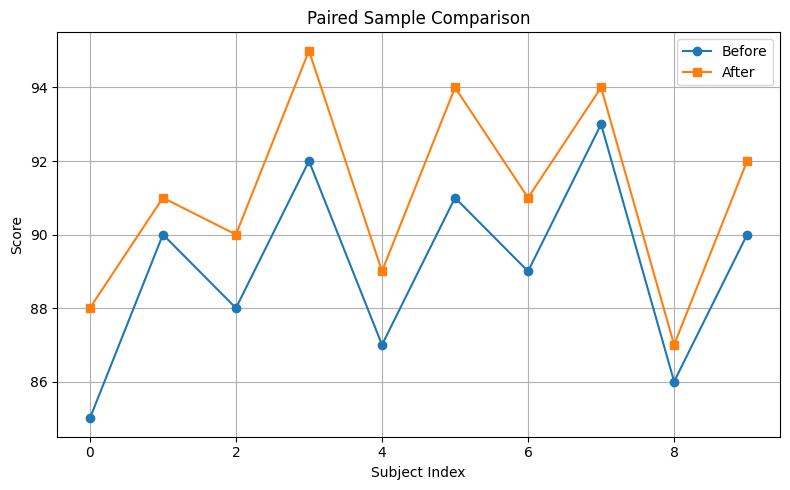

In [10]:
#7-Perform a paired sample T-test using Python and visualize the comparison results.
import numpy as np
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

before = [85, 90, 88, 92, 87, 91, 89, 93, 86, 90]
after  = [88, 91, 90, 95, 89, 94, 91, 94, 87, 92]

t_stat, p_value = ttest_rel(before, after)

print("Mean (Before):", round(np.mean(before), 2))
print("Mean (After):", round(np.mean(after), 2))
print("T-Statistic:", round(t_stat, 4))
print("P-Value:", round(p_value, 4))

alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis (significant change).")
else:
    print("Result: Fail to reject the null hypothesis (no significant change).")

plt.figure(figsize=(8, 5))
x = np.arange(len(before))
plt.plot(x, before, marker='o', label='Before')
plt.plot(x, after, marker='s', label='After')
plt.title("Paired Sample Comparison")
plt.xlabel("Subject Index")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
#8- Simulate data and perform both Z-test and T-test, then compare the results using Python.
import numpy as np
from scipy.stats import ttest_1samp, norm

np.random.seed(42)
population_mean = 100
sample_size = 25
sample = np.random.normal(loc=102, scale=10, size=sample_size)
population_std = 10
sample_mean = np.mean(sample)
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
p_value_z = 2 * (1 - norm.cdf(abs(z_score)))

t_stat, p_value_t = ttest_1samp(sample, popmean=population_mean)

print("Z-Test:")
print(f"  Z-Score     = {z_score:.4f}")
print(f"  P-Value     = {p_value_z:.4f}")

print("\nT-Test:")
print(f"  T-Statistic = {t_stat:.4f}")
print(f"  P-Value     = {p_value_t:.4f}")

alpha = 0.05
print("\nInterpretation:")
if p_value_z < alpha:
    print("  Z-Test: Reject the null hypothesis.")
else:
    print("  Z-Test: Fail to reject the null hypothesis.")

if p_value_t < alpha:
    print("  T-Test: Reject the null hypothesis.")
else:
    print("  T-Test: Fail to reject the null hypothesis.")


Z-Test:
  Z-Score     = 0.1825
  P-Value     = 0.8552

T-Test:
  T-Statistic = 0.1907
  P-Value     = 0.8503

Interpretation:
  Z-Test: Fail to reject the null hypothesis.
  T-Test: Fail to reject the null hypothesis.


In [12]:
#9-Write a Python function to calculate the confidence interval for a sample mean and explain its significance.
import numpy as np
from scipy.stats import t

def confidence_interval(sample, confidence=0.95):

    n = len(sample)
    mean = np.mean(sample)
    std_err = np.std(sample, ddof=1) / np.sqrt(n)
    t_crit = t.ppf((1 + confidence) / 2, df=n-1)

    margin = t_crit * std_err
    return (mean - margin, mean + margin)


In [13]:
#10- Write a Python program to calculate the margin of error for a given confidence level using sample data.
import numpy as np
from scipy.stats import t

def margin_of_error(sample, confidence=0.95):

    n = len(sample)
    std_err = np.std(sample, ddof=1) / np.sqrt(n)  # Standard error of the mean
    t_crit = t.ppf((1 + confidence) / 2, df=n-1)   # t critical value
    moe = t_crit * std_err
    return moe
data = [52, 55, 53, 58, 57, 56, 54, 59, 52, 53]
moe = margin_of_error(data, confidence=0.95)
print(f"Margin of Error (95% confidence): {moe:.2f}")


Margin of Error (95% confidence): 1.80


In [14]:
#11- Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process.
def bayesian_inference(prior, sensitivity, false_positive_rate):

    p_no_disease = 1 - prior
    p_positive = (sensitivity * prior) + (false_positive_rate * p_no_disease)
    posterior = (sensitivity * prior) / p_positive
    return posterior


prior = 0.01
sensitivity = 0.99
false_positive = 0.05

posterior = bayesian_inference(prior, sensitivity, false_positive)
print(f"Probability of having the disease given a positive test: {posterior:.4f} or {posterior*100:.2f}%")


Probability of having the disease given a positive test: 0.1667 or 16.67%


In [15]:
#12-Perform a Chi-square test for independence between two categorical variables in Python.
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

data = [[30, 10, 20],
        [25, 20, 25]]

df = pd.DataFrame(data,
                  index=["Male", "Female"],
                  columns=["Laptop", "Tablet", "Phone"])

chi2, p, dof, expected = chi2_contingency(df)

print("Chi-Square Statistic:", round(chi2, 4))
print("Degrees of Freedom:", dof)
print("P-Value:", round(p, 4))
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=df.index, columns=df.columns))

alpha = 0.05
print("\nConclusion:")
if p < alpha:
    print("Reject the null hypothesis → There is a significant association between Gender and Device Preference.")
else:
    print("Fail to reject the null hypothesis → No significant association between Gender and Device Preference.")


Chi-Square Statistic: 3.5955
Degrees of Freedom: 2
P-Value: 0.1657

Expected Frequencies Table:
           Laptop     Tablet      Phone
Male    25.384615  13.846154  20.769231
Female  29.615385  16.153846  24.230769

Conclusion:
Fail to reject the null hypothesis → No significant association between Gender and Device Preference.


In [16]:
#13-Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data.
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency


observed = np.array([[30, 10, 20],
                     [25, 20, 25]])
df_observed = pd.DataFrame(observed,
                           index=["Male", "Female"],
                           columns=["Laptop", "Tablet", "Phone"])

chi2, p, dof, expected = chi2_contingency(df_observed)
df_expected = pd.DataFrame(expected,
                           index=df_observed.index,
                           columns=df_observed.columns)

print("Observed Frequencies:")
print(df_observed)

print("\nExpected Frequencies (if variables are independent):")
print(df_expected.round(2))



Observed Frequencies:
        Laptop  Tablet  Phone
Male        30      10     20
Female      25      20     25

Expected Frequencies (if variables are independent):
        Laptop  Tablet  Phone
Male     25.38   13.85  20.77
Female   29.62   16.15  24.23


In [17]:
#14-Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution.
from scipy.stats import chisquare
import numpy as np

observed = np.array([18, 22, 20, 25, 15])
expected = np.array([20, 20, 20, 20, 20])
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print("Chi-square Statistic:", round(chi2_stat, 4))
print("P-value:", round(p_value, 4))

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis → Observed data does NOT fit the expected distribution.")
else:
    print("Fail to reject the null hypothesis → Observed data fits the expected distribution.")


Chi-square Statistic: 2.9
P-value: 0.5747
Fail to reject the null hypothesis → Observed data fits the expected distribution.


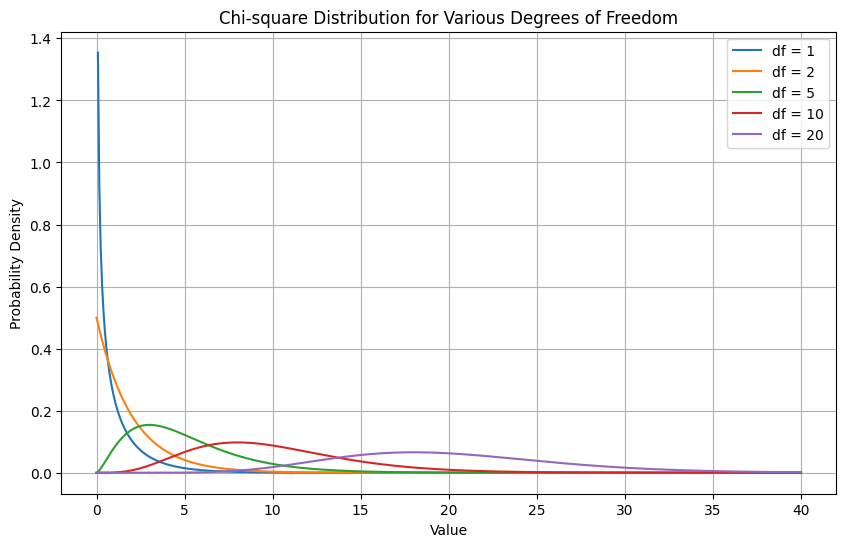

In [18]:
#15- Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

df_values = [1, 2, 5, 10, 20]
x = np.linspace(0, 40, 500)

plt.figure(figsize=(10, 6))
for df in df_values:
    plt.plot(x, chi2.pdf(x, df), label=f'df = {df}')

plt.title('Chi-square Distribution for Various Degrees of Freedom')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
#16-Implement an F-test using Python to compare the variances of two random samples.
import numpy as np
from scipy.stats import f

np.random.seed(42)
sample1 = np.random.normal(loc=50, scale=10, size=30)
sample2 = np.random.normal(loc=50, scale=15, size=30)

var1 = np.var(sample1, ddof=1)
var2 = np.var(sample2, ddof=1)

F = var1 / var2 if var1 > var2 else var2 / var1

df1 = len(sample1) - 1
df2 = len(sample2) - 1

p_value = 2 * min(f.cdf(F, df1, df2), 1 - f.cdf(F, df1, df2))

print("Variance of Sample 1:", round(var1, 2))
print("Variance of Sample 2:", round(var2, 2))
print("F-statistic:", round(F, 4))
print("P-value:", round(p_value, 4))


Variance of Sample 1: 81.0
Variance of Sample 2: 195.06
F-statistic: 2.4082
P-value: 0.0209


In [20]:
#17-Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the results.
import numpy as np
from scipy.stats import f_oneway

group1 = np.array([23, 25, 27, 30, 22])
group2 = np.array([35, 40, 38, 37, 39])
group3 = np.array([20, 21, 19, 22, 18])

f_statistic, p_value = f_oneway(group1, group2, group3)

print("F-statistic:", round(f_statistic, 4))
print("P-value:", round(p_value, 4))

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis → At least one group mean is significantly different.")
else:
    print("Fail to reject the null hypothesis → No significant difference among group means.")



F-statistic: 75.7212
P-value: 0.0
Reject the null hypothesis → At least one group mean is significantly different.


F-statistic: 75.7212
P-value: 0.0


<ipython-input-21-2a10179443f8>:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


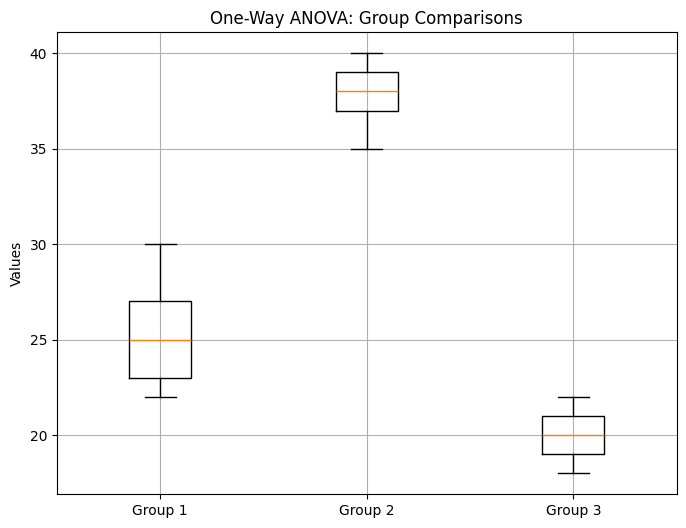

In [21]:
#18-Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

group1 = np.array([23, 25, 27, 30, 22])
group2 = np.array([35, 40, 38, 37, 39])
group3 = np.array([20, 21, 19, 22, 18])

f_statistic, p_value = f_oneway(group1, group2, group3)

print("F-statistic:", round(f_statistic, 4))
print("P-value:", round(p_value, 4))

data = [group1, group2, group3]
labels = ['Group 1', 'Group 2', 'Group 3']

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels)
plt.title("One-Way ANOVA: Group Comparisons")
plt.ylabel("Values")
plt.grid(True)
plt.show()


In [23]:
#19-Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA.
import numpy as np
import scipy.stats as stats

def check_anova_assumptions(*groups):

    print("Normality Check (Shapiro-Wilk Test):")
    for i, group in enumerate(groups):
        stat, p = stats.shapiro(group)
        print(f"  Group {i+1}: p = {round(p, 4)} → {'Normal' if p > 0.05 else 'Not normal'}")

    levene_stat, levene_p = stats.levene(*groups)
    print(f"\nEqual Variance Check (Levene's Test):")
    print(f"  Levene's p = {round(levene_p, 4)} → {'Equal variances' if levene_p > 0.05 else 'Unequal variances'}")

    print("\nIndependence Assumption:")
    print("  Cannot be statistically tested from data alone. Must be ensured by proper sampling/study design.")
group1 = np.array([23, 25, 27, 30, 22])
group2 = np.array([35, 40, 38, 37, 39])
group3 = np.array([20, 21, 19, 22, 18])

check_anova_assumptions(group1, group2, group3)


Normality Check (Shapiro-Wilk Test):
  Group 1: p = 0.7941 → Normal
  Group 2: p = 0.9276 → Normal
  Group 3: p = 0.9672 → Normal

Equal Variance Check (Levene's Test):
  Levene's p = 0.3434 → Equal variances

Independence Assumption:
  Cannot be statistically tested from data alone. Must be ensured by proper sampling/study design.


                                      sum_sq   df         F    PR(>F)
C(Teaching_Method)                194.666667  2.0  2.589800  0.154588
C(Study_Time)                      36.750000  1.0  0.977827  0.360921
C(Teaching_Method):C(Study_Time)   14.000000  2.0  0.186253  0.834686
Residual                          225.500000  6.0       NaN       NaN


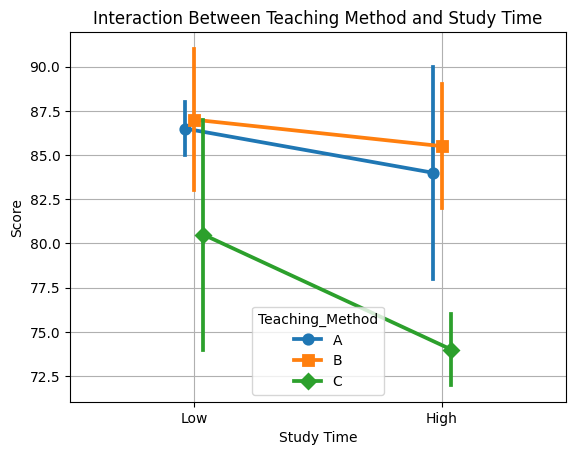

In [24]:
#20- Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the results.
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Score': [85, 90, 88, 78, 83, 82, 91, 89, 87, 76, 74, 72],
    'Teaching_Method': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C'],
    'Study_Time': ['Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High']
}
df = pd.DataFrame(data)

model = ols('Score ~ C(Teaching_Method) + C(Study_Time) + C(Teaching_Method):C(Study_Time)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

sns.pointplot(x='Study_Time', y='Score', hue='Teaching_Method', data=df, dodge=True, markers=["o", "s", "D"])
plt.title("Interaction Between Teaching Method and Study Time")
plt.ylabel("Score")
plt.xlabel("Study Time")
plt.grid(True)
plt.show()



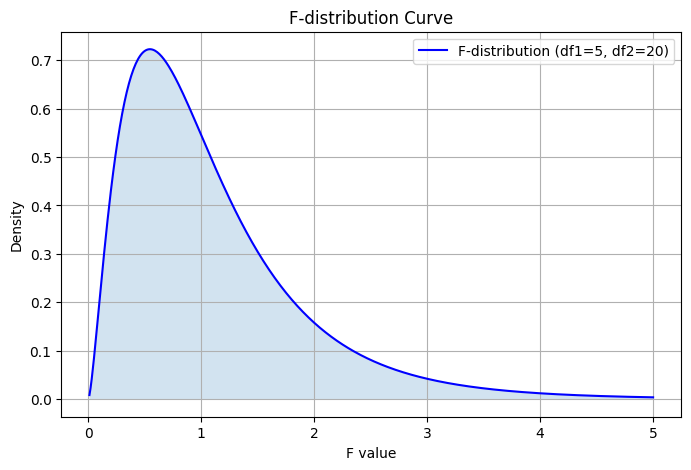

In [25]:
#21-Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

df1 = 5
df2 = 20

x = np.linspace(0.01, 5, 500)
y = f.pdf(x, df1, df2)

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'b-', label=f'F-distribution (df1={df1}, df2={df2})')
plt.fill_between(x, y, alpha=0.2)
plt.title("F-distribution Curve")
plt.xlabel("F value")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()


F-statistic: 111.1724
P-value: 0.0
→ At least one group mean is significantly different.


<ipython-input-26-e8046283a477>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


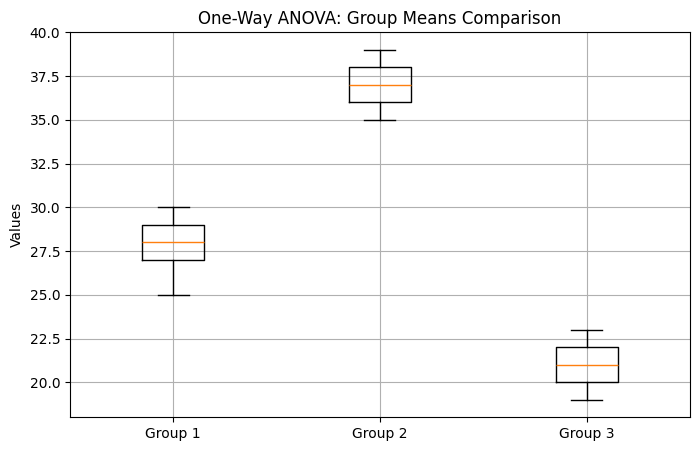

In [26]:
#22-Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

group1 = np.array([25, 27, 29, 30, 28])
group2 = np.array([35, 36, 37, 38, 39])
group3 = np.array([20, 22, 21, 19, 23])

f_stat, p_value = f_oneway(group1, group2, group3)

print("F-statistic:", round(f_stat, 4))
print("P-value:", round(p_value, 4))
if p_value < 0.05:
    print("→ At least one group mean is significantly different.")
else:
    print("→ No significant difference among the group means.")

data = [group1, group2, group3]
labels = ['Group 1', 'Group 2', 'Group 3']

plt.figure(figsize=(8, 5))
plt.boxplot(data, labels=labels)
plt.title("One-Way ANOVA: Group Means Comparison")
plt.ylabel("Values")
plt.grid(True)
plt.show()


In [27]:
#23-Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means.
import numpy as np
from scipy.stats import norm

np.random.seed(0)
sample = np.random.normal(loc=52, scale=10, size=100)
population_mean = 50
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)

z_score = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

p_value = 2 * (1 - norm.cdf(abs(z_score)))

results = {
    "Sample Mean": sample_mean,
    "Sample Std Dev": sample_std,
    "Z-Score": z_score,
    "P-Value": p_value,
    "Decision (alpha=0.05)": "Reject H0" if p_value < 0.05 else "Fail to Reject H0"
}

results


{'Sample Mean': np.float64(52.59808015534484),
 'Sample Std Dev': np.float64(10.129597692685017),
 'Z-Score': np.float64(2.564840415351357),
 'P-Value': np.float64(0.010322326848816177),
 'Decision (alpha=0.05)': 'Reject H0'}

In [28]:
#24- Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results.
import numpy as np
from scipy.stats import chi2

data = np.array([12, 15, 14, 10, 13, 15, 11, 14, 12, 13])

n = len(data)
sample_var = np.var(data, ddof=1)
hypothesized_var = 4
alpha = 0.05

chi2_stat = (n - 1) * sample_var / hypothesized_var

chi2_crit_low = chi2.ppf(alpha / 2, df=n - 1)
chi2_crit_high = chi2.ppf(1 - alpha / 2, df=n - 1)

p_value = 2 * min(
    chi2.cdf(chi2_stat, df=n - 1),
    1 - chi2.cdf(chi2_stat, df=n - 1)
)

print("Sample Variance:", round(sample_var, 4))
print("Chi-square Statistic:", round(chi2_stat, 4))
print("P-value:", round(p_value, 4))
print("Critical Region: chi2 <", round(chi2_crit_low, 2), "or chi2 >", round(chi2_crit_high, 2))

if chi2_stat < chi2_crit_low or chi2_stat > chi2_crit_high:
    print("→ Reject the null hypothesis: The population variance is significantly different from", hypothesized_var)
else:
    print("→ Fail to reject the null hypothesis: No significant difference in population variance.")


Sample Variance: 2.7667
Chi-square Statistic: 6.225
P-value: 0.5656
Critical Region: chi2 < 2.7 or chi2 > 19.02
→ Fail to reject the null hypothesis: No significant difference in population variance.


In [29]:
#25-Write a Python script to perform a Z-test for comparing proportions between two datasets or groups.
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

successes = np.array([45, 30])
samples = np.array([100, 90])

z_stat, p_value = proportions_ztest(count=successes, nobs=samples, alternative='two-sided')

print("Z-statistic:", round(z_stat, 4))
print("P-value:", round(p_value, 4))

if p_value < 0.05:
    print("→ Reject the null hypothesis: Proportions are significantly different.")
else:
    print("→ Fail to reject the null hypothesis: No significant difference in proportions.")


Z-statistic: 1.6427
P-value: 0.1004
→ Fail to reject the null hypothesis: No significant difference in proportions.


Variance Group 1: 2.2381
Variance Group 2: 3.2381
F-statistic: 1.4468
P-value: 0.6651
→ Fail to reject H₀: No significant difference in variances.


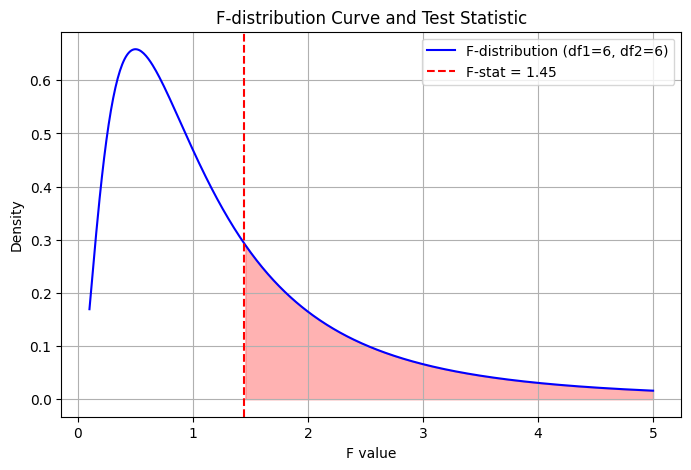

In [30]:
#26- Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

group1 = np.array([12, 14, 15, 16, 13, 12, 14])
group2 = np.array([20, 22, 19, 21, 23, 20, 24])

var1 = np.var(group1, ddof=1)
var2 = np.var(group2, ddof=1)

df1 = len(group1) - 1
df2 = len(group2) - 1

f_stat = var1 / var2 if var1 > var2 else var2 / var1
df_n = df1 if var1 > var2 else df2
df_d = df2 if var1 > var2 else df1

p_value = 2 * min(f.cdf(f_stat, df_n, df_d), 1 - f.cdf(f_stat, df_n, df_d))

print("Variance Group 1:", round(var1, 4))
print("Variance Group 2:", round(var2, 4))
print("F-statistic:", round(f_stat, 4))
print("P-value:", round(p_value, 4))

if p_value < 0.05:
    print("→ Reject H₀: Variances are significantly different.")
else:
    print("→ Fail to reject H₀: No significant difference in variances.")

x = np.linspace(0.1, 5, 500)
y = f.pdf(x, df_n, df_d)

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'b-', label=f'F-distribution (df1={df_n}, df2={df_d})')
plt.axvline(f_stat, color='red', linestyle='--', label=f'F-stat = {round(f_stat, 2)}')
plt.fill_between(x, y, where=(x >= f_stat), color='red', alpha=0.3)
plt.title("F-distribution Curve and Test Statistic")
plt.xlabel("F value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


In [31]:
#27- Perform a Chi-square test for goodness of fit with simulated data and analyze the results.
import numpy as np
from scipy.stats import chisquare

observed = np.array([20, 30, 25, 25])

expected = np.array([25, 25, 25, 25])

chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print("Observed Frequencies:", observed)
print("Expected Frequencies:", expected)
print("Chi-square Statistic:", round(chi2_stat, 4))
print("P-value:", round(p_value, 4))

if p_value < 0.05:
    print("→ Reject H₀: Observed distribution is significantly different from expected.")
else:
    print("→ Fail to reject H₀: No significant difference between observed and expected distribution.")


Observed Frequencies: [20 30 25 25]
Expected Frequencies: [25 25 25 25]
Chi-square Statistic: 2.0
P-value: 0.5724
→ Fail to reject H₀: No significant difference between observed and expected distribution.
